# **14. Algoritmo de Simon**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

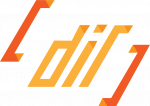

In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer --quiet
!pip install qiskit-ibm-runtime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00


$\textbf{Introducción}$

El algoritmo de Simon, introducido por primera vez en [Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483](https://doi.org/10.1137/S0097539796298637) , fue el primer algoritmo cuántico en mostrar una aceleración exponencial en comparación con el mejor algoritmo clásico para resolver un problema específico. Esto inspiró los algoritmos cuánticos basados ​​en la transformada cuántica de Fourier, utilizada en el algoritmo cuántico más famoso: el algoritmo de factorización de Shor.

$\textbf{Problema de Simon}$

Se nos da una función de **caja negra** desconocida $f$, que se garantiza que es uno a uno ($1:1$) o dos a uno ($2:1$), donde las funciones uno a uno y dos a uno tienen las siguientes propiedades:

- **Uno a uno:** asigna exactamente una salida única a cada entrada. Un ejemplo con una función que toma 4 entradas es:

$$f(1)→1,\quad f(2)→2,\quad f(3)→3,\quad f(4)→4.$$

- **Dos a uno:** asigna exactamente dos entradas a cada salida única. Un ejemplo con una función que toma cuatro entradas es:

$$f(1)→1,\quad f(2)→2,\quad f(3)→1,\quad f(4)→2.$$

Esta asignación de dos a uno se realiza según una cadena de bits oculta, $b$, donde:

Dado $x_{1},x_{2}:\quad f(x_{1})=f(x_{2})$ se garantiza que $x_{1}⊕x_{2}=b$

Dada esta caja negra $f$, *¿con qué rapidez podemos determinar si $f$ es uno a uno o dos a uno?* Entonces, si $f$ resulta ser dos a uno, *¿con qué rapidez podemos determinar $b$?* Resulta que ambos casos se reducen al mismo problema: encontrar $b$, donde una cadena de bits de $b= 0000...$ representa la $f$ uno a uno.

$\textbf{Solución Clásica}$

Clásicamente, si queremos saber el valor de $b$ con $100$% de certeza para una $f$ dada, debemos verificar hasta $2^{n-1}+1$ entradas, donde $n$ es el número de bits en la entrada. Esto implica verificar un poco más de la mitad de todas las entradas posibles hasta encontrar dos casos con la misma salida. Al igual que en el problema de Deutsch-Jozsa, con suerte, podríamos resolver el problema en nuestros dos primeros intentos. Pero si obtenemos una $f$ uno a uno, o si tenemos muy mala suerte con una $f$ dos a uno, entonces nos quedamos con el valor completo de $2^{n-1}+1$. Existen algoritmos conocidos que tienen una cota inferior de $\mathcal{O}(2^{n/2})$, pero, en general, la complejidad crece exponencialmente con $n$.

$\textbf{Solución Cuántica}$

El circuito cuántico que implementa el **algoritmo de Simon** se muestra a continuación.

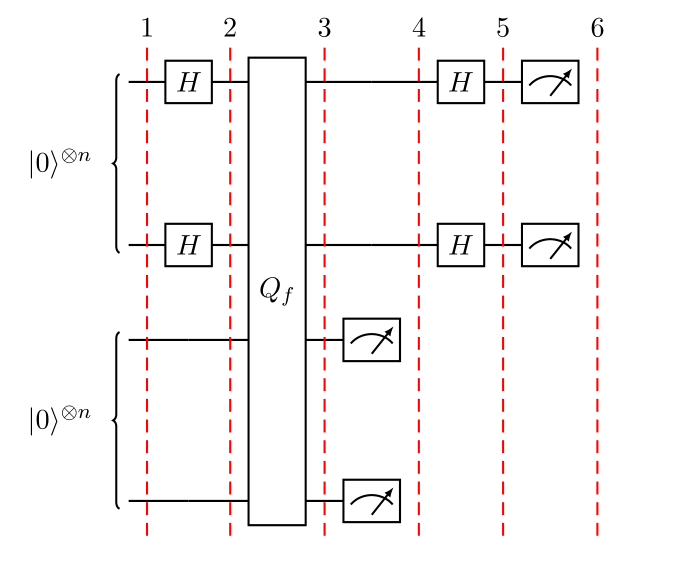

Donde la función de consulta (u oráculo), $Q_f$ actúa sobre **dos registros cuánticos** como:

$$\vert x\rangle\vert a\rangle→\vert x\rangle\vert a⊕f(x)\rangle$$

En el caso específico de que el **segundo registro** esté en el estado $|0⟩$ tenemos:

$$\vert x\rangle\vert 0\rangle =\vert x\rangle\vert f(x)\rangle$$

El algoritmo consta de los siguientes pasos:

- Dos registros de entrada de $n$ cúbits se inicializan a cero:

$$\vert\psi_{1}\rangle =\vert 0\rangle^{\otimes n}\vert 0\rangle^{\otimes n}.$$

- Aplicar una transformación Hadamard al primer registro:

$$\vert\psi_{2}\rangle =\frac{1}{\sqrt{2^{n}}}\sum_{x\in\{0,1\}^{n}}\vert x\rangle\vert 0\rangle^{\otimes n}$$

- Aplicar el oráculo $Q_f$

$$\vert\psi_{3}\rangle =\frac{1}{\sqrt{2^{n}}}\sum_{x\in\{0,1\}^{n}}\vert x\rangle\vert f(x)\rangle$$

- Mida el segundo registro. Se observará un valor de $f(x)$. Debido al planteamiento del problema, el valor observado de $f(x)$ podría corresponder a dos posibles entradas: $x$ e $y=x\oplus b$. Por lo tanto, el primer registro se convierte en:

$$\vert\psi_{4}\rangle =\frac{1}{\sqrt{2^{n}}}\left(\vert x\rangle +\vert y\rangle\right)$$

Una vez obtenemos el resultados de salida procedemos a realizar Hadamard sobre el **primer registro**

$$H^{\otimes n}\vert x\rangle =\frac{1}{\sqrt{2^{n}}}\sum_{y}(-1)^{x\cdot y}\vert y\rangle$$

donde **omitimos** el **segundo registro** ya que ha sido medido.

- Aplicar Hadamard sobre el **primer registro**:

$$\vert\psi_{5}\rangle =\frac{1}{\sqrt{2^{n}+1}}\sum_{x\in\{0,1\}^{n}}\left[(-1)^{x\cdot z}+(-1)^{y\cdot z}\right]\vert z\rangle$$

- La medición del **primer registro** dará una salida solo si:

$$(-1)^{x\cdot z}=(-1)^{y\cdot z}$$

lo que significa:

\begin{align}
x\cdot z & =y\cdot z\\
         & =(x\oplus b)\cdot z\\
         & =x\cdot z\oplus b\cdot z
\end{align}

donde $b\cdot z=0 \mod 2$

Se medirá una cadena (string) $z$ cuyo producto interno con $b$ sea igual a cero. Por lo tanto, repitiendo el algoritmo $\approx n$ veces, se obtendrán $n$ valores diferentes de $z$ y se podrá escribir el siguiente sistema de ecuaciones:

\begin{equation}
\left\{ \begin{aligned}
  b\cdot z_{1} &=0\\
  b\cdot z_{2} &=0\\
  \vdots\\
  b\cdot z_{n} &=0
\end{aligned} \right.
\end{equation}

Así pues, en este problema en particular, el algoritmo cuántico realiza exponencialmente menos pasos que el clásico. De nuevo, puede resultar difícil imaginar una aplicación de este algoritmo (aunque inspiró el algoritmo más famoso creado por Shor), pero representa la primera prueba de que puede haber una aceleración exponencial en la resolución de un problema específico utilizando una computadora cuántica en lugar de una clásica.

$\textbf{Ejemplo}$

Veamos el ejemplo del algoritmo de Simon para 2 qubits con la cadena secreta $b=11$, de modo que $f(x) = f(y)$ si $y = x \oplus b$. El circuito cuántico para resolver el problema es

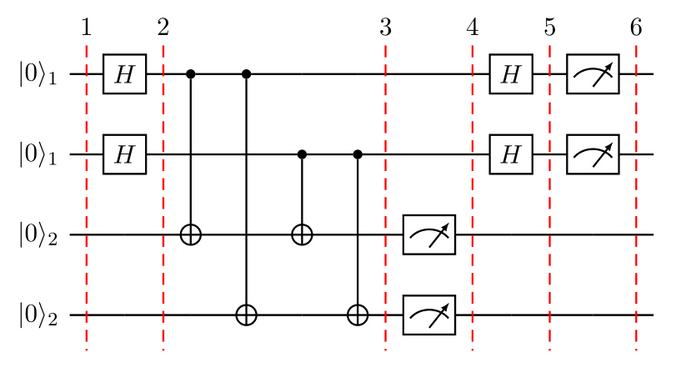

**1.** Dos registros de entrada de 2 qubits se inicializan en el estado cero:

$$\vert\psi_{1}\rangle =\vert 00\rangle_{1}\vert 00\rangle_{2}$$

 **2.** Aplicar compuertas Hadamard a los qubits en el primer registro:

$$\vert\psi_{2}\rangle =\frac{1}{2}\left(\vert 00\rangle_{1}+\vert 01\rangle_{1}+\vert 10\rangle_{1}+\vert 11\rangle_{1}\right)\vert 00\rangle_{2}$$

**3.** Para la cadena $b=11$, la función de consulta u oráculo se puede implementar como

$$Q_{f}=CX_{1_{a}2_{a}}CX_{1_{a}2_{b}}CX_{1_{b}2_{a}}CX_{1_{b}2_{b}}$$

$$\vert\psi_{3}\rangle =Q_{f}\vert\psi_{2}\rangle$$

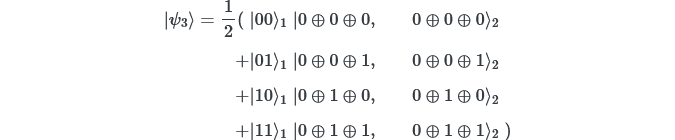

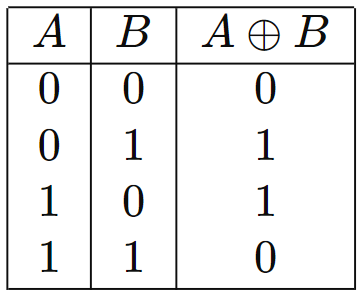

Por lo tanto:

$$\vert\psi_{3}\rangle =\frac{1}{2}\left(\vert 00\rangle_{1}\vert 00\rangle_{2}+\vert 01\rangle_{1}\vert 11\rangle_{2}+\vert 10\rangle_{1}\vert 11\rangle_{2}+\vert 11\rangle_{1}\vert 00\rangle_{2}\right)$$

$$\vert\psi_{3}\rangle =\frac{1}{2}\left(\vert 00\rangle_{1}+\vert 11\rangle_{1}\right)\vert 00\rangle_{2}+\frac{1}{2}\left(\vert 01\rangle_{1}+\vert 10\rangle_{1}\right)\vert 11\rangle_{2}$$

**4.** Medimos el segundo registro. Con una probabilidad del 50%, veremos $|00⟩_2$ o $|11⟩_2$. Para el ejemplo, supongamos que vemos $|11⟩_2$. El estado del sistema es entonces

$$\vert\psi_{4}\rangle =\frac{1}{\sqrt{2}}\left(\vert 01\rangle_{1}+\vert 10\rangle_{1}\right)$$

**5.** Aplicar Hadamard sobre el primer registro $\vert\psi_{5}\rangle =H\vert\psi_{4}\rangle$

\begin{align}
\vert\psi_{5}\rangle &=\frac{1}{2}\left[H\vert 0\rangle\otimes H\vert 1\rangle +H\vert 1\rangle\otimes H\vert 0\rangle\right]\\\\
                     &=\frac{1}{2\sqrt{2}}\left[\left(\vert 0\rangle +\vert 1\rangle\right)\otimes \left(\vert 0\rangle -\vert 1\rangle\right)+\left(\vert 0\rangle -\vert 1\rangle\right)\otimes \left(\vert 0\rangle +\vert 1\rangle\right)\right]\\\\
                     &=\frac{1}{2\sqrt{2}}\left(\vert 00\rangle-\vert 01\rangle+\vert 10\rangle-\vert 11\rangle+\vert 00\rangle+\vert 01\rangle-\vert 10\rangle-\vert 11\rangle\right)\\\\
                     &=\frac{1}{\sqrt{2}}\left(\vert 00\rangle-\vert 11\rangle\right)
\end{align}

**6.** Medir el primer registro dará $|00⟩$ o $|11⟩$ con la misma probabilidad. Si vemos $|11⟩$ entonces

$$b\cdot 11=0$$

Lo cual nos indica que $b \ne 01$ o $10$, y las dos posibles soluciones restantes son $b=00$ o $b=11$. Nótese que $b=00$ siempre será una solución trivial para nuestras ecuaciones simultáneas. Si repetimos los pasos 1 a 6 muchas veces, solo mediríamos $|00\rangle$ o $|11⟩$ como

$$b\cdot 11=0$$

$$b\cdot 00=0$$

Son las únicas ecuaciones que satisfacen $b=11$. Podemos verificar $b=11$ eligiendo una entrada aleatoria ($x_i$) y comprobando $f(x_i) = f(x_i \oplus b)$. Por ejemplo:

$$01\oplus b=10$$

$$f(01)=f(10)=11$$

# **Implementación en Qiskit**

In [ ]:
# importaciones
import matplotlib.pyplot as plt
import numpy as np

from qiskit_aer import AerSimulator # Simulador
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import Operator, Statevector

from qiskit.visualization import plot_histogram

$\textbf{Oráculo}$

El algoritmo de Simon busca una cadena de bits oculta $b\in\{0,1\}^n$ de un oráculo $f_b$ que cumpla $f_b(x) = f_b(y)$ si y solo si $y = x \oplus b$ para todo $ x \in \{0,1\}^n$. Aquí, se realiza la operación $XOR$ bit a bit. Por lo tanto, si $b=0.....0$, es decir, la cadena de bits es solo cero, entonces $f_b$ es una función uno a uno (o permutación). De lo contrario, si $b \ne 0...0$, entonces $f_b$ es una función dos a uno.

En el algoritmo, el oráculo recibe $\vert x⟩\vert 0⟩$ como entrada. Con respecto a un $b$ predeterminado, el oráculo escribe su salida en el segundo registro para transformar la entrada en $\vert x⟩\vert f_b(x)⟩$ tal que $f(x) = f(x \oplus b)$ para todo $x\in\{0,1\}^n$
.

Esta función de caja negra se puede implementar mediante los siguientes procedimientos:

- Copiar el contenido del primer registro al segundo.

$$\vert x\rangle\vert 0\rangle\rightarrow\vert x\rangle\vert x\rangle$$

- (Creación de mapeo 1 a 1 o 2 a 1) Si $b$ no es todo cero, entonces existe el índice menor $j$, de modo que $b_j = 1$. Si $x_j = 0$, se aplica una operación $XOR$ al segundo registro con $b$. De lo contrario, no se modifica el segundo registro.

$$\vert x\rangle\vert x\rangle\rightarrow\vert x\rangle\vert x\oplus b\rangle$$

Si $x_{j}=0$ para el último índice $j$

- (Creando permutación aleatoria) Permutar y voltear aleatoriamente los qubits del segundo registro.

$$\vert x\rangle\vert x\rangle\rightarrow\vert x\rangle\vert f_{b}(y)\rangle$$

In [ ]:
b = '110'

n = len(b)

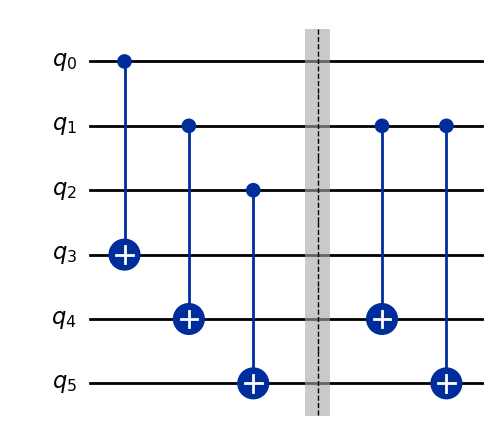

In [ ]:
def simon_oracle(b):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # revierte b para facilitar la iteración
    n = len(b)
    qc = QuantumCircuit(n*2)
    # |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b:
        return qc  # 1:1 mapping, so just exit
    # Barrera
    qc.barrier()
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc

oracle_circuit = simon_oracle(b)

# Dibujar el circuito
oracle_circuit.draw("mpl")

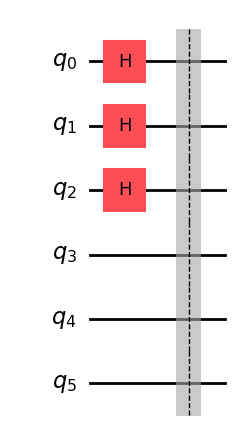

In [ ]:
s_circuit = QuantumCircuit(n*2)

# Apply Hadamard gates before querying the oracle
for q in range(n):
    s_circuit.h(q)

# Apply barrier for visual separation
s_circuit.barrier()

# Dibujar circuito
s_circuit.draw('mpl')

Aplicando el oráculo obtenemos

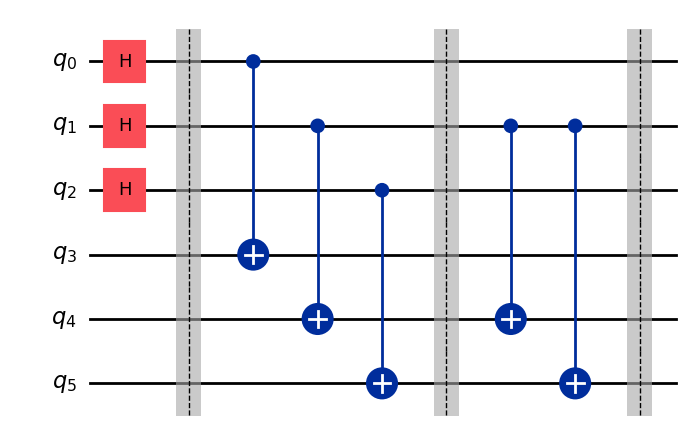

In [ ]:
oracle_s_circuit = s_circuit.compose(oracle_circuit)
oracle_s_circuit.barrier()
oracle_s_circuit.draw('mpl')

In [ ]:
Statevector(oracle_s_circuit).draw('latex')

<IPython.core.display.Latex object>

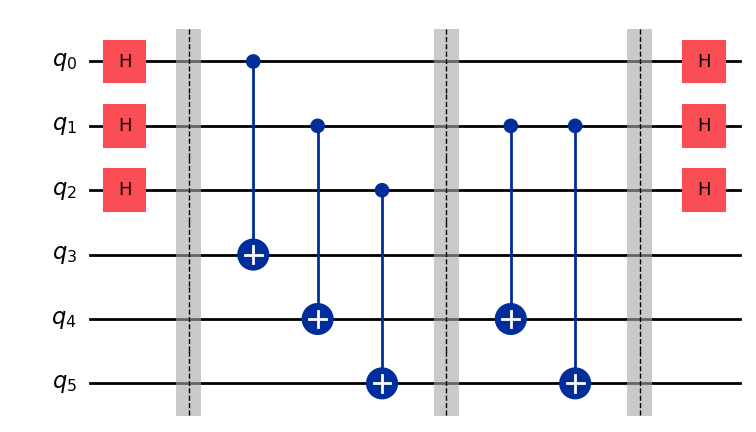

In [ ]:
# Aplicar Hadamard después del oráculo
oracle_s_h_circuit = oracle_s_circuit.compose(QuantumCircuit(n*2))  # Copia el circuito

# Aplicar Hadamard a los primeros n qubits
for q in range(n):
    oracle_s_h_circuit.h(q)

# Dibujar el circuito final
oracle_s_h_circuit.draw('mpl')

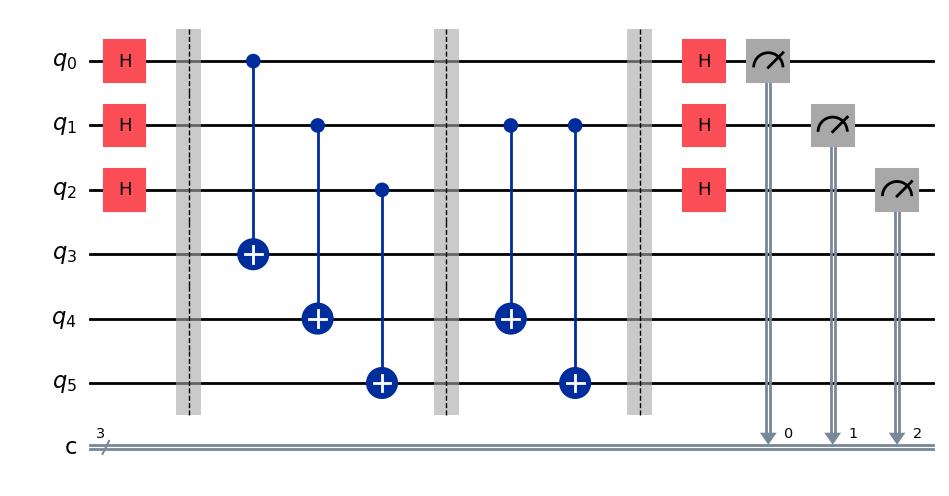

In [ ]:
# Agregar registros clásicos para las mediciones
oracle_s_h_circuit_meas = QuantumCircuit(n*2, n)  # Agregar n bits clásicos

# Copiar el circuito ya construido
oracle_s_h_circuit_meas.compose(oracle_s_h_circuit, inplace=True)

# Agregar mediciones en los primeros n qubits
for i in range(n):
    oracle_s_h_circuit_meas.measure(i, i)

# Dibujar el circuito final con medición
oracle_s_h_circuit_meas.draw('mpl')

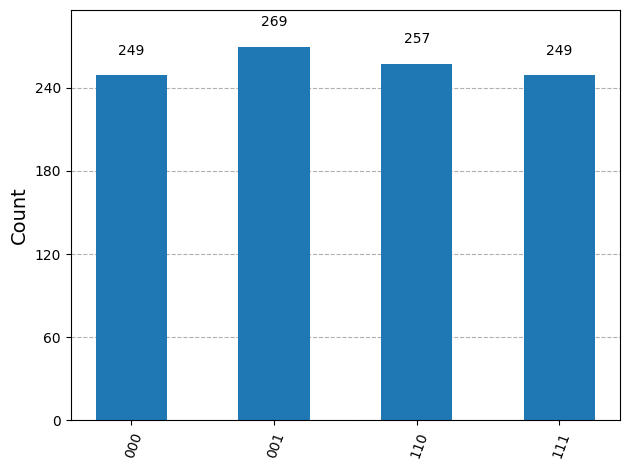

In [ ]:
# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(oracle_s_h_circuit_meas)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma

plot_histogram(counts)

$\textbf{Cuál es el secreto de la cadena $s$?}$

In [ ]:
def solve_simon(counts, n):
    # Convertir los resultados en vectores binarios
    bitstrings = list(counts.keys())
    equations = []

    for b in bitstrings:
        y = np.array([int(bit) for bit in b[::-1]])  # invertir por convención Qiskit
        equations.append(y)

    equations = np.array(equations)

    # Resolver el sistema de ecuaciones y.s = 0 (mod 2)
    # Usaremos eliminación de Gauss en GF(2)
    equations = equations % 2
    rank = 0
    m, n_vars = equations.shape
    A = equations.copy()

    for col in range(n_vars):
        # Buscar pivote
        pivot = None
        for row in range(rank, m):
            if A[row, col] == 1:
                pivot = row
                break
        if pivot is None:
            continue
        # Intercambiar filas
        A[[rank, pivot]] = A[[pivot, rank]]
        # Eliminar debajo
        for row in range(m):
            if row != rank and A[row, col] == 1:
                A[row] = (A[row] + A[rank]) % 2
        rank += 1

    # El secreto s es un vector no trivial en el espacio nulo de A
    # Aquí buscamos un vector que satisfaga A.s = 0 mod 2
    for guess in range(1, 2**n_vars):
        s_candidate = np.array([int(x) for x in f"{guess:0{n_vars}b}"])[::-1]
        if np.all((A @ s_candidate) % 2 == 0):
            return ''.join(str(bit) for bit in s_candidate[::-1])

    return None


In [ ]:
secret = solve_simon(counts, n)
print("El secreto encontrado es:", secret)

El secreto encontrado es: 110
